## Dataset Creation

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)
    df.columns = df.iloc[0]
    df = df[1:]
    df['RTT'] = pd.to_numeric(df['RTT'], downcast="float")
    df['MessageSize'] = pd.to_numeric(df['MessageSize'], downcast="integer")
    df['NumberOfMessages'] = pd.to_numeric(df['NumberOfMessages'], downcast="integer")
    df[df.columns[4]] = pd.to_numeric(df[df.columns[4]], downcast="integer")
    
    return df

In [4]:
def getBenchmark(benchmark):
    resultsFolder = "../credentials/results/Benchmark"+str(benchmark)+"/"
    resultsFiles = os.listdir(resultsFolder)

    df = getDataframe(resultsFolder+resultsFiles[0])
    for i in range(len(resultsFiles)-1):
        df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
    return df
    

In [203]:
def plot_results(df, messagesComb, yerror, title, x_label, x_column):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_title(title +'\n', fontsize=20)
    ax.set_ylabel('Média de RTT (ms)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    legend = []
    
    for comb in messagesComb:
        legend.append("\nNº Mensagens: " + str(comb[1]) + "\nTamanho Mensagem:" + str(comb[0])+ '\n')
        exp = df[df.MessageSize == comb[0]]
        exp = exp[exp.NumberOfMessages == comb[1]]
        if yerror:
            plt.errorbar(exp[x_column], exp['RTT_mean'], yerr=exp['RTT_std'], fmt='--s')
        else:
             plt.errorbar(exp[x_column], exp['RTT_mean'], fmt='--s')
    
    ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    fig.tight_layout()

As funções abaixo servem para fazer uma aprocimação otimizadas dos gráficos gerados.

A função **funcE** aproxima a curva para uma exponencial, e **funcL** aproxima para uma reta.

In [180]:
def funcE(x, a, b, c):
    return b*np.exp(a*x) + c

def funcL(x, a, b):
    return a*x + b

## Dataset Statistics

In [53]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 25.0
Valores Mínimos: 0.0
Valores Médios: 0.41225
Valores Desvio: 0.985408


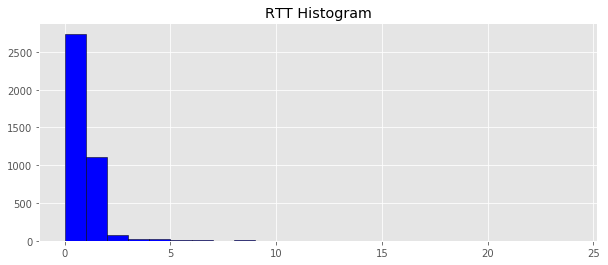

In [54]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),1), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [204]:
df = getBenchmark(1)
df = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfHosts,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,0.319000,0.0,14.0,0.762772
1,2,1,2000,0.259000,0.0,16.0,0.665688
2,2,1000,1000,0.311000,0.0,9.0,0.768681
3,2,1000,2000,0.268000,0.0,12.0,0.678532
4,3,1,1000,0.307500,0.0,15.0,0.757780
5,3,1,2000,0.250000,0.0,10.0,0.547334
6,3,1000,1000,0.266500,0.0,8.0,0.572400
7,3,1000,2000,0.250750,0.0,16.0,0.607014
8,4,1,1000,0.278667,0.0,18.0,0.683008
9,4,1,2000,0.227000,0.0,18.0,0.555148


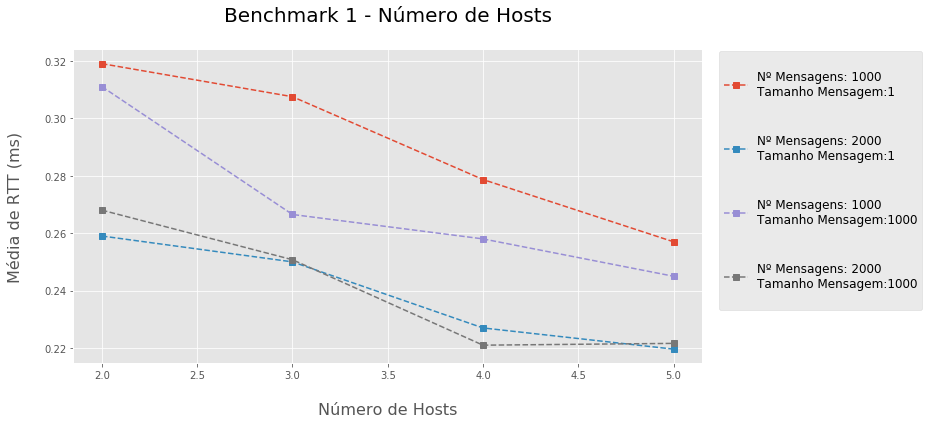

In [205]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb, False,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')

## Benchmark 2

In [206]:
df = getBenchmark(2)
df = df.groupby(['NumberOfSender', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfSender,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,1,1,1000,0.3310,0.0,9.0,0.760274
1,1,1,2000,0.2490,0.0,14.0,0.697311
2,1,1000,1000,0.3420,0.0,8.0,0.705361
3,1,1000,2000,0.2775,0.0,12.0,0.694791
4,2,1,1000,0.3130,0.0,12.0,0.819575
5,2,1,2000,0.2360,0.0,10.0,0.549049
6,2,1000,1000,0.3300,0.0,13.0,0.842502
7,2,1000,2000,0.2605,0.0,16.0,0.779707
8,3,1,1000,0.3470,0.0,14.0,0.940998
9,3,1,2000,0.2440,0.0,12.0,0.676530


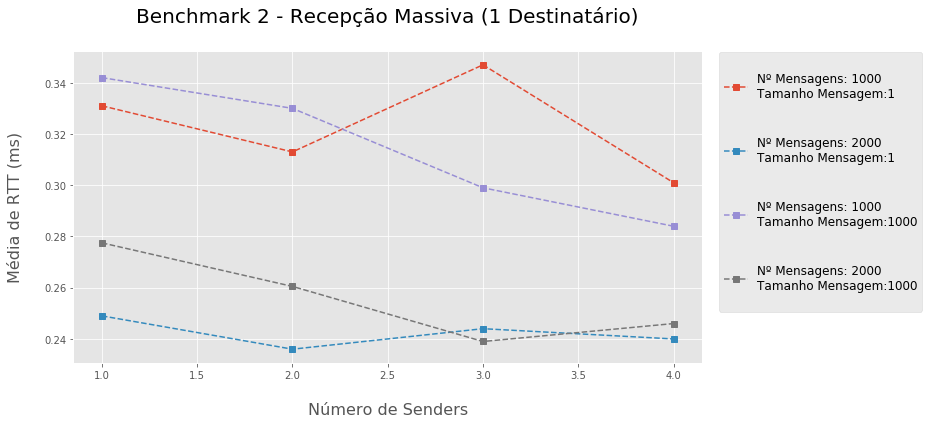

In [207]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False,
            'Benchmark 2 - Recepção Massiva (1 Destinatário)', 
            'Número de Senders', 
            'NumberOfSender')

## Benchmark 3

In [208]:
df = getBenchmark(3)
df = df.groupby(['NumberOfPairs', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfPairs,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,0.3190,0.0,10.0,0.722330
1,2,1,2000,0.2435,0.0,18.0,0.737889
2,2,1000,1000,0.3120,0.0,15.0,0.829062
3,2,1000,2000,0.2380,0.0,14.0,0.617695
4,3,1,1000,0.2870,0.0,8.0,0.590745
5,3,1,2000,0.2590,0.0,19.0,0.850459
6,3,1000,1000,0.3150,0.0,11.0,0.682819
7,3,1000,2000,0.2530,0.0,14.0,0.729560
8,4,1,1000,0.3030,0.0,13.0,0.652393
9,4,1,2000,0.2485,0.0,11.0,0.617202


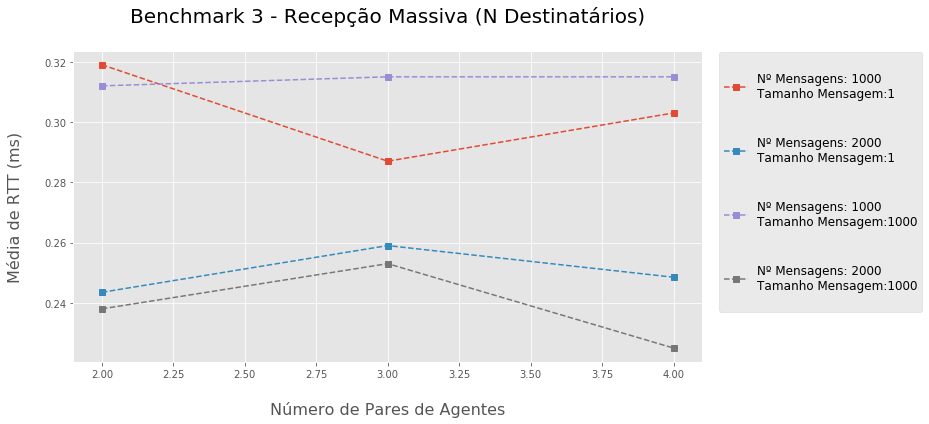

In [209]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False,
            'Benchmark 3 - Recepção Massiva (N Destinatários)', 
            'Número de Pares de Agentes', 
            'NumberOfPairs')

## Benchmark 4 - InterPlataforma

In [210]:
df = getBenchmark(4)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,10,1,1000,25.327999,0.0,210.0,29.205803
1,20,1,1000,250.733948,0.0,2020.0,132.101685
2,30,1,1000,621.671326,0.0,4523.0,322.189789
3,40,1,1000,1167.123657,1.0,8195.0,288.681427


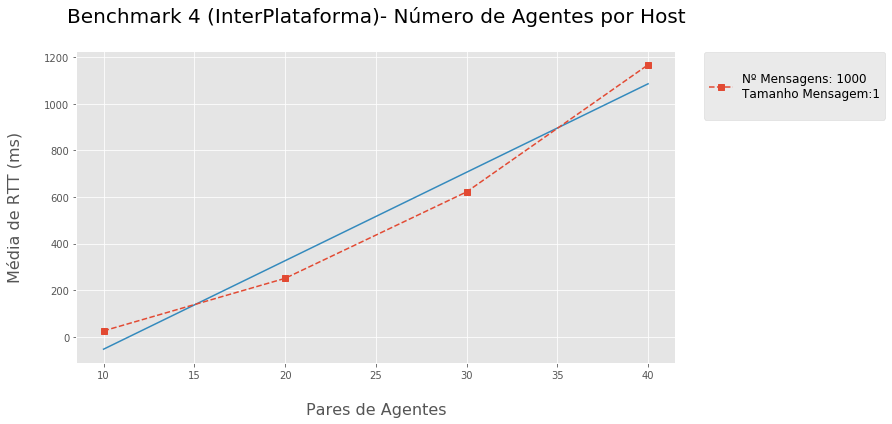

In [211]:
func = funcL

messagesComb = [(1,1000)]
plot_results(df, messagesComb, False,
            'Benchmark 4 (InterPlataforma)- Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(funcL, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(10, 40, 100)
plt.plot(xdata, func(xdata, *popt))

## Benchmark 4 - IntraPlataforma

In [212]:
df = getBenchmark(5)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,5,1,1000,2.281000,0.0,77.0,7.152845
1,5,1000,1000,2.041000,0.0,54.0,5.424458
2,10,1,1000,50.092999,0.0,363.0,44.400291
3,10,1000,1000,61.425999,0.0,225.0,42.369537
4,15,1,1000,145.854996,0.0,758.0,113.037796
5,15,1000,1000,154.164001,0.0,1043.0,130.981720
6,20,1,1000,236.722000,0.0,3346.0,212.434784
7,20,1000,1000,293.317993,0.0,2046.0,234.041397
8,25,1,1000,492.776001,16.0,3680.0,393.474640
9,25,1000,1000,537.598022,0.0,2876.0,449.381256


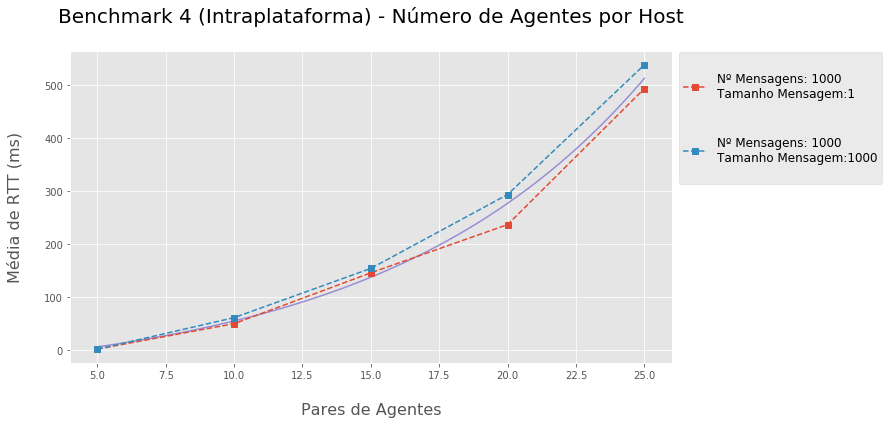

In [213]:
func = funcE

messagesComb = [(1,1000), (1000,1000)]
plot_results(df, messagesComb, False,
            'Benchmark 4 (Intraplataforma) - Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(5, 25, 100)
plt.plot(xdata, func(xdata, *popt))

In [214]:
print(popt)

[  0.10492307  41.83802179 -64.29615843]
